<a href="https://colab.research.google.com/github/Yogeeth/CSS-Button-Animations/blob/main/dpr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dense Passage Retrieval##  
Instead of representing queries and documents with sparse word counts (like TF-IDF), DPR encodes both queries and documents into dense vectors using two separate BERT-based encoders:  
DPR = Dual Encoder:  
* One encoder for queries
* One encoder for passages

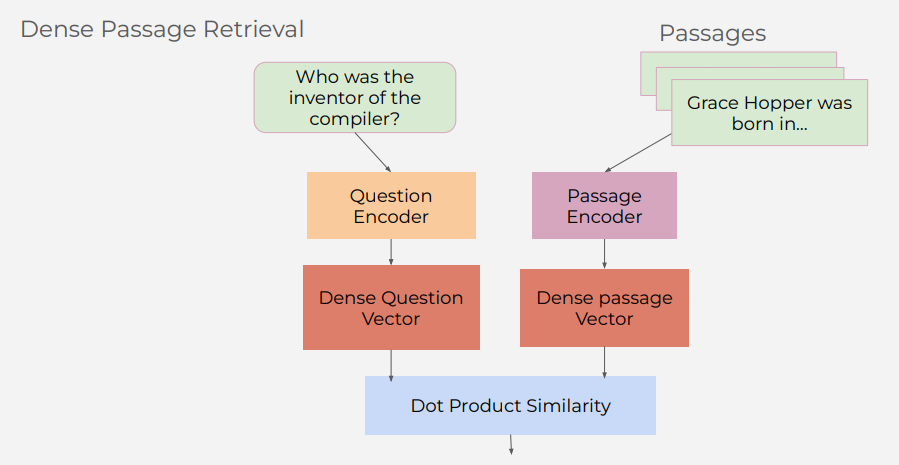

In [ ]:
from transformers import (
    DPRQuestionEncoder,
    DPRContextEncoder,
    DPRQuestionEncoderTokenizer,
    DPRContextEncoderTokenizer,
)
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
question_encoder = DPRQuestionEncoder.from_pretrained(
    "facebook/dpr-question_encoder-single-nq-base"
)
context_encoder = DPRContextEncoder.from_pretrained(
    "facebook/dpr-ctx_encoder-single-nq-base"
)
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained(
    "facebook/dpr-question_encoder-single-nq-base"
)
context_tokenizer = DPRContextEncoderTokenizer.from_pretrained(
    "facebook/dpr-ctx_encoder-single-nq-base"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.


In [ ]:
query='Was Fire The First Invention'
q_inputs=question_tokenizer(query,return_tensors='pt')
print(q_inputs)

{'input_ids': tensor([[  101,  2001,  2543,  1996,  2034, 11028,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
q_embeddings=question_encoder(**q_inputs).pooler_output
print(q_embeddings)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


tensor([[-2.1601e-02,  2.3906e-01, -1.3933e-01,  2.4266e-01, -7.1553e-02,
          1.4705e-01,  2.4295e-01, -3.0148e-01, -1.3679e-01, -1.4169e-01,
          2.5666e-02, -9.1409e-02, -9.7130e-02,  7.6315e-02, -6.6055e-02,
         -2.7324e-01, -1.7608e-01, -9.9541e-02,  1.3907e-02,  2.7247e-01,
         -9.3835e-02, -1.6608e-01, -1.6691e-01,  9.0949e-02,  3.7967e-01,
          6.0101e-02,  6.2748e-02, -1.5884e-01,  2.1431e-01,  3.0100e-01,
         -7.6529e-02,  4.3978e-02,  3.1459e-01, -3.3350e-01, -4.3593e-01,
          2.6800e-01, -3.9606e-01,  1.6009e-01,  2.3615e-02, -1.1018e-01,
         -1.1142e-01,  3.0268e-01,  3.0906e-01, -1.9913e-01,  2.1590e-02,
          1.9864e-01, -7.2757e-01,  1.7800e-01,  7.5171e-02,  2.8956e-01,
         -2.3946e-01,  2.0930e-01, -2.3712e-01,  8.9733e-02, -5.2807e-01,
          8.4872e-03, -2.4967e-02,  2.7761e-01, -3.8409e-02,  1.3517e-01,
          1.9367e-02, -8.8107e-02,  2.5074e-01,  1.0913e-01, -6.0833e-02,
         -1.3355e-02,  4.8548e-02,  2.

In [ ]:
passages = [
    "Fire is a chemical process of combustion, releasing heat and light. It requires fuel, oxygen, and heat—the fire triangle—to sustain itself. Fire has been essential to human survival for cooking, warmth, and protection.",
    "Fire Is the First Invention",
    "Prometheus, in Greek mythology, is known for stealing fire from the gods and giving it to humanity. This act symbolizes the gift of knowledge, technology, and progress, but also defiance and suffering.",
    "Wildfires are uncontrolled fires that burn in forests, grasslands, or prairies. They can start from natural causes like lightning or human activities, and are influenced by wind, temperature, and dryness.",
    "In Hindu rituals, Agni, the fire god, acts as a mediator between humans and gods. Fire (Agni) is considered sacred and used in offerings, marriages, and purification ceremonies.",
    "Plasma, the fourth state of matter, is similar to fire in appearance. However, plasma is made of ionized gas with free electrons, found in stars, lightning, and fusion reactors—not true combustion like fire.",
    "Controlled fire is used in agriculture as a method of land clearing and soil rejuvenation. This practice, called slash-and-burn or prescribed burning, has benefits and environmental risks.",
    "In Buddhism, fire symbolizes desire and attachment, which must be overcome to reach enlightenment. The Fire Sermon by Gautama Buddha taught the renunciation of sensory fire.",
    "Firefighters use infrared cameras and thermal imaging to locate fire hotspots in buildings. Advanced gear includes flame-retardant suits, breathing apparatus, and fire suppression foam for chemical fires.",
    "Anala represents the divine form of fire."
]


In [ ]:
context_embeddings = []
for passage in passages:
    context_inputs = context_tokenizer(passage, return_tensors="pt")
    context_embedding = context_encoder(**context_inputs).pooler_output
    context_embeddings.append(context_embedding)

In [ ]:
context_embeddings = torch.cat(context_embeddings, dim=0)

In [ ]:
similarities = cosine_similarity(
    q_embeddings.detach().numpy(), context_embeddings.detach().numpy()
)
print("Similarities:", similarities)

Similarities: [[0.62908924 0.73535067 0.54455656 0.4920949  0.476686   0.49713337
  0.5169519  0.54152936 0.54382735 0.5364526 ]]


In [ ]:
most_relevant_idx = np.argmax(similarities)
print("Most relevant passage:", passages[most_relevant_idx])

Most relevant passage: Fire Is the First Invention
